In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import kwant
%matplotlib inline

In [2]:
graphene = kwant.lattice.honeycomb(a=1)
g1, g2 = graphene.sublattices
hbn = kwant.lattice.honeycomb(a=1.018)
hbn1, hbn2 = hbn.sublattices

In [6]:
def make_system(r=10):
    
    def onsite(t=1):
        return(t)
    
    def circle(pos):
        x, y = pos
        return(x**2 + y**2 < r**2)
    
    sys = kwant.Builder()
    
    sys[[graphene.shape(circle, (0, 0))]] = onsite
    sys[[hbn.shape(circle, (0, 0))]] = onsite
    
    hoppings = (((0, 0), g1, g2), ((0, 1), g1, g2), ((-1, 1), g1, g2))
    hoppings2 = (((0, 0), hbn1, hbn2), ((0, 1), hbn1, hbn2), ((-1, 1), hbn1, hbn2))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = -1
    #sys = sys.finalized()
    
    return(sys)
    
def family_colors(site):
    colors = {g1: 'black', g2: 'black', hbn1: 'blue', hbn2: 'red' }
    #return 'black' #if site.family == g1 else 'white'
    return(colors[site.family])

In [7]:
system = make_system()

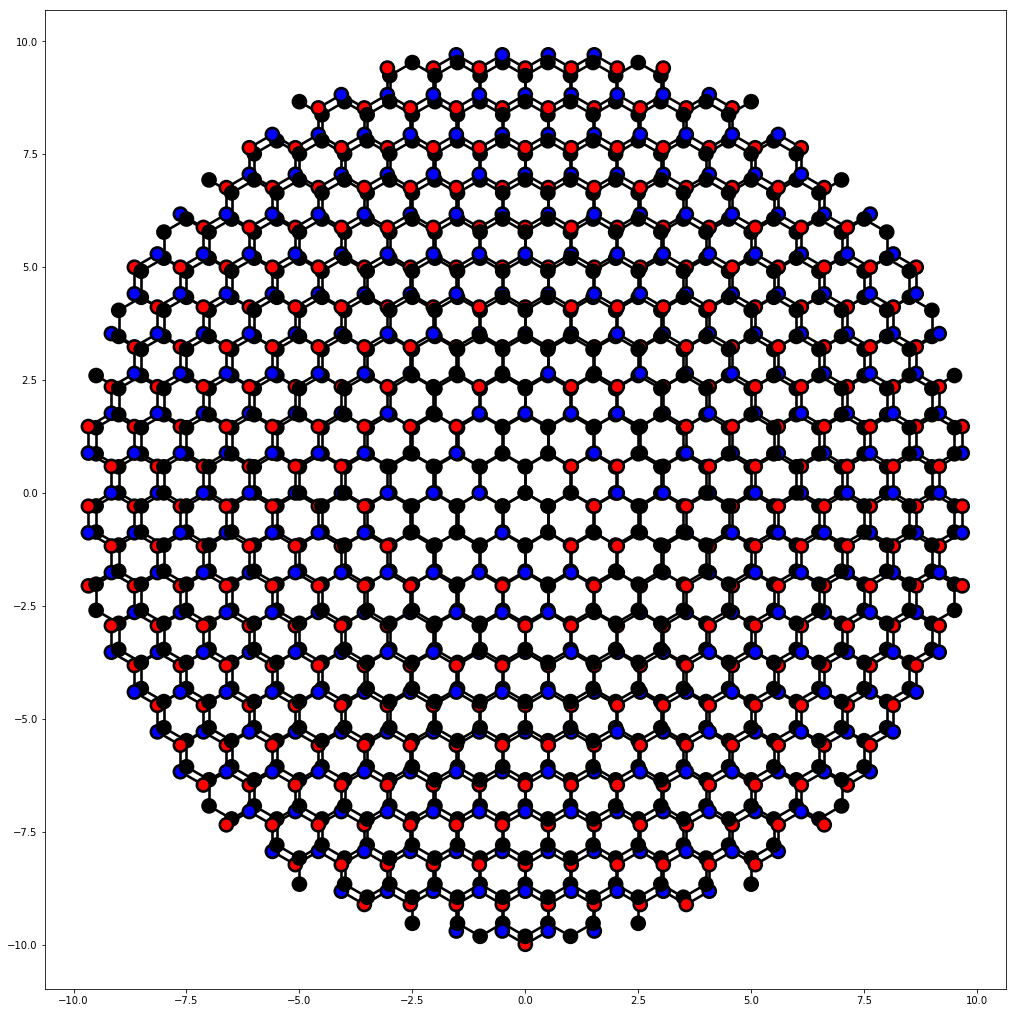

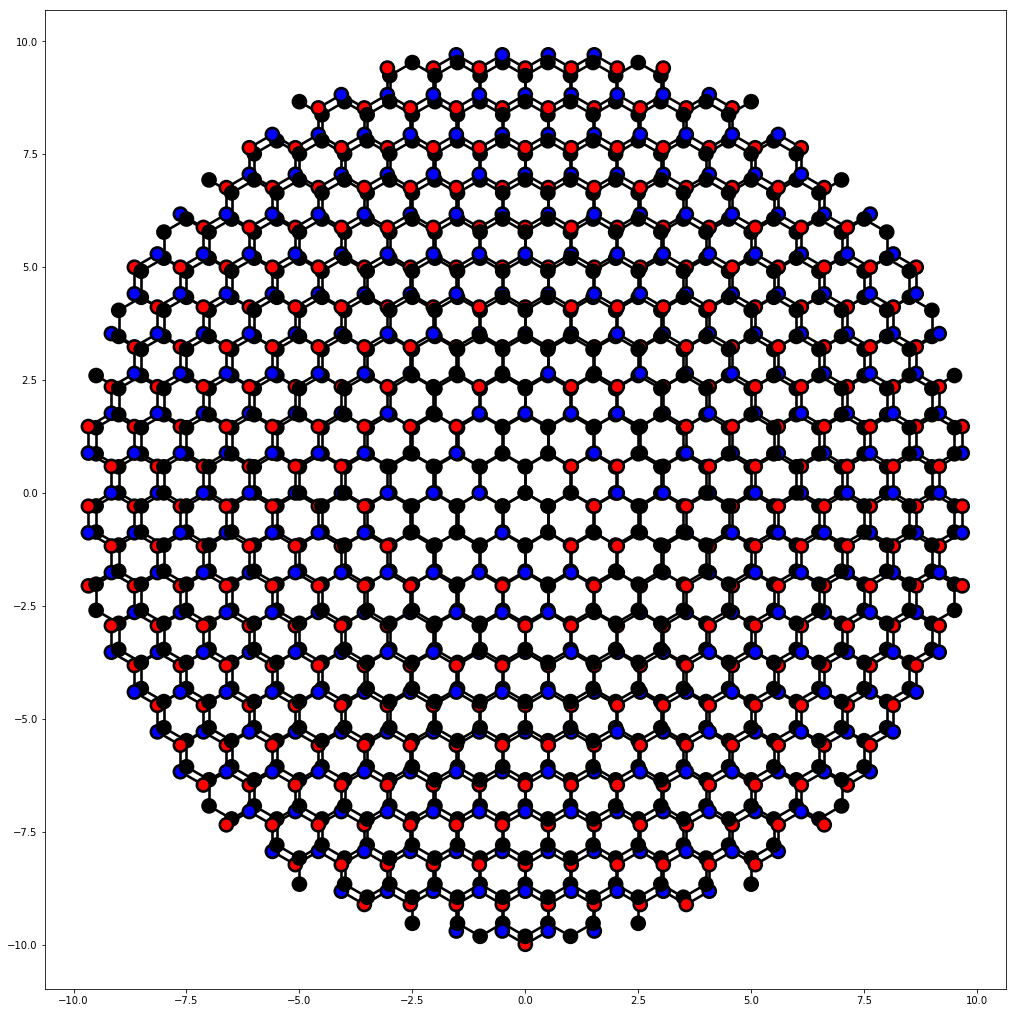

In [8]:
kwant.plotter.plot(system, site_color=family_colors, site_lw=0.1, colorbar=False, fig_size=(32, 18))